# Lab 4- Object Oriented Programming

For all of the exercises below, make sure you provide tests of your solutions.


1. Write a "counter" class that can be incremented up to a specified maximum value, will print an error if an attempt is made to increment beyond that value, and allows reseting the counter. 

In [1]:
class Counter:
    def __init__(self, max_value):
        self.max_value = max_value
        self.current_value = 0 # making starting value 0

    def increment(self):
        if self.current_value < self.max_value:
            self.current_value += 1 #if less than max value, continue to add 1
            return self.current_value
        else:
            return "Error: Maximum value reached. Cannot increment." # once max is reached print this

    def reset(self):
        self.current_value = 0 # a way to reset the counter to zero
        return "Incrementer reset to 0."

# Example
incr = Counter(10)
for _ in range(12):  # Trying to increment beyond the max value
    print(incr.increment())

1
2
3
4
5
6
7
8
9
10
Error: Maximum value reached. Cannot increment.
Error: Maximum value reached. Cannot increment.


2. Copy and paste your solution to question 1 and modify it so that all the data held by the counter is private. Implement functions to check the value of the counter, check the maximum value, and check if the counter is at the maximum.

In [2]:
class Incrementer:
    def __init__(self, max_value):
        self.max_value = max_value
        self.current_value = 0

    def __increment(self): # making the methods private 
        if self.current_value < self.max_value:
            self.current_value += 1
            return self.current_value
        else:
            return "Error: Maximum value reached. Cannot increment."

    def __reset(self):
        self.current_value = 0
        return "Incrementer reset to 0."

# Example 
incr = Incrementer(10)
for _ in range(12):  # Trying to increment beyond the max value
    print(incr.increment())

AttributeError: 'Incrementer' object has no attribute 'increment'

3. Implement a class to represent a rectangle, holding the length, width, and $x$ and $y$ coordinates of a corner of the object. Implement functions that compute the area and perimeter of the rectangle. Make all data members private and privide accessors to retrieve values of data members. 

In [2]:
class rectangle:
    def __init__(self,x,y,l,w, **kwargs):
        self.__x=x 
        self.__y=y
        self.__l=l
        self.__w=w # creating the variables and making them private
    
    def area(self):
        return self.__l*self.__w
    def perimeter(self):
        return 2*(self.__l+self.__w) # using the length & width to find the perimeter and area

rectangle=rectangle(5,3,2,2) # testing the data
print("Area:", rectangle.area())
print("Perimeter:", rectangle.perimeter())

Area: 4
Perimeter: 8


4. Implement a class to represent a circle, holding the radius and $x$ and $y$ coordinates of center of the object. Implement functions that compute the area and perimeter of the rectangle. Make all data members private and privide accessors to retrieve values of data members. 

In [3]:
import math
class circle:
    def __init__(self,x,y,radius, **kwargs):
        self.__x=x
        self.__y=y
        self.__radius=radius # variables for circle
        
    def area(self):
        return math.pi*self.__radius**2
    def perimeter(self):
        return 2*math.pi*self.__radius # math to find the perimeter and area

#example
circle=circle(5,3,2)
print("Area:", circle.area())
print("Perimeter:", circle.perimeter())

Area: 12.566370614359172
Perimeter: 12.566370614359172


5. Implement a common base class for the classes implemented in 3 and 4 above which implements all common methods as not implemented functions (virtual). Re-implement your regtangle and circule classes to inherit from the base class and overload the functions accordingly. 

In [4]:
class shape:
    def __init__(self, x, y):
        self.x = x # all shapes will have coordinates
        self.y = y

    def area(self):  # making it so that each subclass has its own area and perimeter method
        raise NotImplementedError("Subclass must implement abstract method")

    def perimeter(self):
        raise NotImplementedError("Subclass must implement abstract method")

class rectangle(shape):
    def __init__(self,x,y,l,w):
        super().__init__(x,y)
        self.l=l
        self.w=w
    def area(self):
        return self.l*self.w
    def perimeter(self):
        return 2*(self.l+self.w) # using the length & width to find the perimeter and area
    
class circle(shape):
    def __init__(self, x, y, radius):
        super().__init__(x, y)
        self.radius = radius
    def area(self):
        return math.pi*self.radius**2
    def perimeter(self):
        return 2*math.pi*self.radius # math to find the perimeter and area

# example 
circle = circle(5, 3, 2)
print("Circle Area:", circle.area())
print("Circle Perimeter:", circle.perimeter())

rectangle = rectangle(2, 4, 6, 3)
print("Rectangle Area:", rectangle.area())
print("Rectangle Perimeter:", rectangle.perimeter())

Circle Area: 12.566370614359172
Circle Perimeter: 12.566370614359172
Rectangle Area: 18
Rectangle Perimeter: 18


6. Implement a triangle class analogous to the rectangle and circle in question 5.

In [5]:
class triangle(shape):
    def __init__(self,a,b,c,h,x,y):
        super().__init__(x, y)
        self.a=a
        self.b=b
        self.c=c
        self.h=h 
    def area(self): #creating variables for triangle
        return (self.h*self.b)/2
    def perimeter(self):
        return self.a+self.b+self.c # math to solve for area and perimeter

triangle=triangle(3,4,5,2,0,0)
print("Triangle area:", triangle.area())  
print("Rectangle Perimeter:", triangle.perimeter())

Triangle area: 4.0
Rectangle Perimeter: 12


7. Add a function to the object classes, including the base, that returns a list of up to 16 pairs of  $x$ and $y$ points on the parameter of the object. 

In [6]:
class shape:
    def __init__(self, x, y):
        self.x = x # all shapes will have coordinates
        self.y = y
    def area(self):  # making it so that each subclass has its own area and perimeter method
        raise NotImplementedError("Subclass must implement abstract method")
    def perimeter(self):
        raise NotImplementedError("Subclass must implement abstract method")
    def get_boundary(self):
        raise NotImplementedError("Subclass must implement sample_points method")

class rectangle(shape):
    def __init__(self,x,y,l,w):
        super().__init__(x,y)
        self.l=l
        self.w=w
    def area(self):
        return self.l*self.w
    def perimeter(self):
        return 2*(self.l+self.w) # using the length & width to find the perimeter and area
    def get_boundary(self):
        boundary = []
        for i in range(16):
            if i < 4:
                boundary.append((self.x + i, self.y))
            elif i < 8:
                boundary.append((self.x + self.l, self.y + i - 3))
            elif i < 12:
                boundary.append((self.x + self.l - (i - 7), self.y + self.w))
            else:
                boundary.append((self.x, self.y + self.w - (i - 11)))
        return boundary

class circle(shape):
    def __init__(self, x, y, radius):
        super().__init__(x, y)
        self.radius = radius
    def area(self):
        return math.pi*self.radius**2
    def perimeter(self):
        return 2*math.pi*self.radius # math to find the perimeter and area
    def get_boundary(self):
        boundary = []
        for i in range(16):
            angle = 2 * 3.14 * i / 16
            x = self.x + self.radius * math.cos(angle)
            y = self.y + self.radius * math.sin(angle)
            boundary.append((x, y))
        return boundary

class triangle(shape):
    def __init__(self,a,b,c,h,x,y):
        super().__init__(x, y)
        self.a=a
        self.b=b
        self.c=c
        self.h=h
    def area(self):
        return (self.h*self.b)/2
    def perimeter(self):
        return self.a+self.b+self.c
    def get_boundary(self):
        boundary = []
        for i in range(16):
            if i < 6:
                x = self.x + i * self.a / 5
                y = self.y
            elif i < 11:
                x = self.x + self.a
                y = self.y + (i - 5) * self.b / 5
            else:
                x = self.x + self.a - (i - 10) * self.a / 5
                y = self.y + self.b
            boundary.append((x, y))
        return boundary

In [7]:
rectangle = rectangle(5,3,0,0)
circle = circle(5,0,0)
triangle = triangle(3,4,5,2,0,0)

print("Rectangle boundary points:", rectangle.get_boundary())
print("Circle boundary points:", circle.get_boundary())
print("Triangle boundary points:", triangle.get_boundary())


Rectangle boundary points: [(5, 3), (6, 3), (7, 3), (8, 3), (5, 4), (5, 5), (5, 6), (5, 7), (4, 3), (3, 3), (2, 3), (1, 3), (5, 2), (5, 1), (5, 0), (5, -1)]
Circle boundary points: [(5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0), (5.0, 0.0)]
Triangle boundary points: [(0.0, 0), (0.6, 0), (1.2, 0), (1.8, 0), (2.4, 0), (3.0, 0), (3, 0.8), (3, 1.6), (3, 2.4), (3, 3.2), (3, 4.0), (2.4, 4), (1.8, 4), (1.2, 4), (0.6000000000000001, 4), (0.0, 4)]


8. Add a function to the object classes, including the base, that tests if a given set of $x$ and $y$ coordinates are inside of the object. You'll have to think through how to determine if a set of coordinates are inside an object for each object type.

In [8]:
class shape:
    def __init__(self, x, y):
        self.x = x # all shapes will have coordinates
        self.y = y
    def area(self):  # making it so that each subclass has its own methods
        raise NotImplementedError("Subclass must implement abstract method")
    def perimeter(self):
        raise NotImplementedError("Subclass must implement abstract method")
    def get_boundary(self):
        raise NotImplementedError("Subclass must implement abstract method")
    def contains_points(self):
        raise NotImplementedError("Subclass must implement abstract method")

class rectangle(shape):
    def __init__(self,x,y,l,w):
        super().__init__(x,y)
        self.l=l
        self.w=w
    def area(self):
        return self.l*self.w
    def perimeter(self):
        return 2*(self.l+self.w) # using the length & width to find the perimeter and area
    def get_boundary(self):
        boundary = []
        for i in range(16):
            if i < 4:
                boundary.append((self.x + i, self.y))
            elif i < 8:
                boundary.append((self.x + self.l, self.y + i - 3))
            elif i < 12:
                boundary.append((self.x + self.l - (i - 7), self.y + self.w))
            else:
                boundary.append((self.x, self.y + self.w - (i - 11)))
        return boundary
    def contains_point(self, x, y) -> bool: # making this method a boolean 
        half_l = self.l / 2
        half_w = self.w / 2 #take both the length and width of the rectangle and divide in half
        return (self.x - half_l <= x <= self.x + half_l) and (self.y - half_w <= y <= self.y + half_w)
                        # then checks if each of the x and y coordinates provided are between x/y and the half of the length and width
class circle(shape):
    def __init__(self, x, y, radius):
        super().__init__(x, y)
        self.radius = radius
    def area(self):
        return math.pi*self.radius**2
    def perimeter(self):
        return 2*math.pi*self.radius # math to find the perimeter and area
    def get_boundary(self):
        boundary = []
        for i in range(16):
            angle = 2 * 3.14 * i / 16
            x = self.x + self.radius * math.cos(angle)
            y = self.y + self.radius * math.sin(angle)
            boundary.append((x, y))
        return boundary
    def contains_point(self, x, y) -> bool:
        dx = x - self.x
        dy = y - self.y 
        return (dx * dx + dy * dy) <= self.radius**2
                 #squaring the radius and seeing if the points provided lies on or inside the circle
class triangle(shape):
    def __init__(self,a,b,c,h,x,y):
        super().__init__(x, y)
        self.a=a
        self.b=b
        self.c=c
        self.h=h
    def area(self, points=None):
        # If no points are passed, calculate the area of the triangle using its base and height 
        if points is None:
            return (self.h * self.b) / 2
        else:
            # Otherwise, calculate the area of the triangle given the three points
            A, B, C = points
            return abs(A[0] * (B[1] - C[1]) + B[0] * (C[1] - A[1]) + C[0] * (A[1] - B[1])) / 2

    def perimeter(self):
        return self.a+self.b+self.c
    def get_boundary(self):
        boundary = []
        for i in range(16):
            if i < 6:
                x = self.x + i * self.a / 5
                y = self.y
            elif i < 11:
                x = self.x + self.a
                y = self.y + (i - 5) * self.b / 5
            else:
                x = self.x + self.a - (i - 10) * self.a / 5
                y = self.y + self.b
            boundary.append((x, y))
        return boundary
    
    def contains_point(self, x, y) -> bool:
        A = (self.x, self.y)  # left corner of the triangle
        B = (self.x + self.b, self.y)  # right corner of the triangle's base
        C = (self.x + self.b / 2, self.y + self.h)  # Top of the triangle
        P = (x, y)

        # Calculate the areas of the main triangle and the sub-triangles formed with the point P
        area_ABC = self.area([A, B, C])
        area_PAB = self.area([P, A, B])
        area_PBC = self.area([P, B, C])
        area_PCA = self.area([P, C, A])

        # Check if the point is inside the triangle (the areas must sum up to the total area)
        return area_ABC == area_PAB + area_PBC + area_PCA

In [9]:
if __name__ == "__main__":
    rect = rectangle(5, 3, 10, 6)   
    circ = circle(5, 0, 3)
    tri = triangle(3, 4, 5, 2, 0, 0)  #points/size of original of all shapes

    test_points = [(0, 0), (5, 5), (3, 3), (-4, -2), (1, 1), (10, 10)]
    # Points we are testing for all shapes

    print("Testing Rectangle contains_point:")
    for pt in test_points:
        print(f"Point {pt} inside rectangle? {rect.contains_point(*pt)}")
    
    print("\nTesting Circle contains_point:")
    for pt in test_points:
        print(f"Point {pt} inside circle? {circ.contains_point(*pt)}")
    
    print("\nTesting Triangle contains_point:")
    for pt in test_points:
        print(f"Point {pt} inside triangle? {tri.contains_point(*pt)}")
             # print whether the points are within the shape 

Testing Rectangle contains_point:
Point (0, 0) inside rectangle? True
Point (5, 5) inside rectangle? True
Point (3, 3) inside rectangle? True
Point (-4, -2) inside rectangle? False
Point (1, 1) inside rectangle? True
Point (10, 10) inside rectangle? False

Testing Circle contains_point:
Point (0, 0) inside circle? False
Point (5, 5) inside circle? False
Point (3, 3) inside circle? False
Point (-4, -2) inside circle? False
Point (1, 1) inside circle? False
Point (10, 10) inside circle? False

Testing Triangle contains_point:
Point (0, 0) inside triangle? True
Point (5, 5) inside triangle? False
Point (3, 3) inside triangle? False
Point (-4, -2) inside triangle? False
Point (1, 1) inside triangle? True
Point (10, 10) inside triangle? False


9. Add a function in the base class of the object classes that returns true/false testing that the object overlaps with another object.

In [2]:
class shape:
    def __init__(self, x, y):
        self.x = x # all shapes will have coordinates
        self.y = y
    def area(self):  # making it so that each subclass has its own methods
        raise NotImplementedError("Subclass must implement abstract method")
    def perimeter(self):
        raise NotImplementedError("Subclass must implement abstract method")
    def get_boundary(self):
        raise NotImplementedError("Subclass must implement abstract method")
    def contains_points(self):
        raise NotImplementedError("Subclass must implement abstract method")

class rectangle(shape):
    def __init__(self, x, y, l, w):
        super().__init__(x, y)
        self.l = l
        self.w = w
    def area(self):
        return self.l * self.w
    def perimeter(self):
        return 2 * (self.l + self.w)
    def get_boundary(self):
        boundary = []
        for i in range(16):
            if i < 4:
                boundary.append((self.x + i, self.y))
            elif i < 8:
                boundary.append((self.x + self.l, self.y + i - 3))
            elif i < 12:
                boundary.append((self.x + self.l - (i - 7), self.y + self.w))
            else:
                boundary.append((self.x, self.y + self.w - (i - 11)))
        return boundary
    def contains_point(self, x, y) -> bool:
        half_l = self.l / 2
        half_w = self.w / 2
        return (self.x - half_l <= x <= self.x + half_l) and (self.y - half_w <= y <= self.y + half_w)
    def overlaps_with(self, other):
        # Check for overlap between two rectangles
        if isinstance(other, rectangle):
            return not (self.x + self.l < other.x or  # self is to the left of other
                        self.x > other.x + other.l or  # self is to the right of other
                        self.y + self.w < other.y or  # self is below other
                        self.y > other.y + other.w)  # self is above other
        return False  


class circle(shape):
    def __init__(self, x, y, radius):
        super().__init__(x, y)
        self.radius = radius
    def area(self):
        return math.pi * self.radius**2
    def perimeter(self):
        return 2 * math.pi * self.radius
    def get_boundary(self):
        boundary = []
        for i in range(16):
            angle = 2 * 3.14 * i / 16
            x = self.x + self.radius * math.cos(angle)
            y = self.y + self.radius * math.sin(angle)
            boundary.append((x, y))
        return boundary
    def contains_point(self, x, y) -> bool:
        dx = x - self.x
        dy = y - self.y
        return (dx * dx + dy * dy) <= self.radius**2
    def overlaps_with(self, other):
        # Check for overlap between two circles
        if isinstance(other, circle):
            dx = other.x - self.x
            dy = other.y - self.y
            distance = math.sqrt(dx**2 + dy**2)
            return distance < (self.radius + other.radius)
        return False  

class triangle(shape):
    def __init__(self, a, b, c, h, x, y):
        super().__init__(x, y)
        self.a = a
        self.b = b
        self.c = c
        self.h = h
    def area(self):
        return (self.h * self.b) / 2
    def perimeter(self):
        return self.a + self.b + self.c
    def get_boundary(self):
        boundary = []
        for i in range(16):
            if i < 6:
                x = self.x + i * self.a / 5
                y = self.y
            elif i < 11:
                x = self.x + self.a
                y = self.y + (i - 5) * self.b / 5
            else:
                x = self.x + self.a - (i - 10) * self.a / 5
                y = self.y + self.b
            boundary.append((x, y))
        return boundary
    def contains_point(self, x, y) -> bool:
        A = (self.x, self.y)
        B = (self.x + self.b, self.y)
        C = (self.x + self.b / 2, self.y + self.h)
        P = (x, y)

        area_ABC = self.area([A, B, C])
        area_PAB = self.area([P, A, B])
        area_PBC = self.area([P, B, C])
        area_PCA = self.area([P, C, A])

        return area_ABC == area_PAB + area_PBC + area_PCA
    def overlaps_with(self, other):
        # check for overlap between two triangles 
        if isinstance(other, triangle):
            return not (self.x + self.b < other.x or  # self is to the left of other
                        self.x > other.x + other.b or  # self is to the right of other
                        self.y + self.h < other.y or  # self is below other
                        self.y > other.y + other.h)  # self is above other
        return False  


In [3]:
import math

#testing code
rect1 = rectangle(0, 0, 4, 5)  # rectangle at (0, 0) with length 4 and width 5
rect2 = rectangle(2, 2, 4, 5)  # rectangle at (2, 2) with length 4 and width 5
circle1 = circle(0, 0, 3)      # circle at (0, 0) with radius 3
circle2 = circle(3, 3, 3)      # circle at (3, 3) with radius 3
tri1 = triangle(4, 4, 4, 4, 0, 0)  #triangle with base 4, height 4, and starting at (0, 0)
tri2 = triangle(4, 4, 4, 4, 2, 2)  #triangle with base 4, height 4, and starting at (2, 2)

print("Rectangle 1 and Rectangle 2 overlap:", rect1.overlaps_with(rect2))
print("Rectangle 1 and Circle 1 overlap:", rect1.overlaps_with(circle1))
print("Circle 1 and Circle 2 overlap:", circle1.overlaps_with(circle2))
print("Rectangle 1 and Triangle 1 overlap:", rect1.overlaps_with(tri1))
print("Triangle 1 and Triangle 2 overlap:", tri1.overlaps_with(tri2))



Rectangle 1 and Rectangle 2 overlap: True
Rectangle 1 and Circle 1 overlap: False
Circle 1 and Circle 2 overlap: True
Rectangle 1 and Triangle 1 overlap: False
Triangle 1 and Triangle 2 overlap: True


10. Copy the `Canvas` class from lecture to in a python file creating a `paint` module. Copy your classes from above into the module and implement paint functions. Implement a `CompoundShape` class. Create a simple drawing demonstrating that all of your classes are working.

In [4]:
import math
import tkinter as tk
class CompoundShape(shape):
    def __init__(self):
        self.shapes = []

    def add_shape(self, shape):
        self.shapes.append(shape)

    def area(self):
        return sum(s.area() for s in self.shapes)

    def perimeter(self):
        return sum(s.perimeter() for s in self.shapes)

    def get_boundary(self):
        boundary = []
        for s in self.shapes:
            boundary.extend(s.get_boundary())
        return boundary

    def contains_points(self):
        # Composite contains_point method
        pass

    def overlaps_with(self, other):
        for shape in self.shapes:
            if any(shape.overlaps_with(o) for o in other.shapes):
                return True
        return False


# Canvas class using tkinter for basic drawing
class Canvas(tk.Canvas):
    def __init__(self, root, width=500, height=500):
        super().__init__(root, width=width, height=height)
        self.pack()

    def draw_shape(self, shape):
        if isinstance(shape, rectangle):
            self.create_rectangle(shape.x, shape.y, shape.x + shape.l, shape.y + shape.w, fill="blue")
        elif isinstance(shape, circle):
            self.create_oval(shape.x - shape.radius, shape.y - shape.radius,
                             shape.x + shape.radius, shape.y + shape.radius, fill="red")
        elif isinstance(shape, triangle):
            self.create_polygon(shape.x, shape.y, 
                                shape.x + shape.b, shape.y, 
                                shape.x + shape.b / 2, shape.y + shape.h, 
                                fill="green")


def drawing():
    root = tk.Tk()
    canvas = Canvas(root)

    # Create shapes
    rect1 = rectangle(50, 50, 100, 100)
    circ1 = circle(200, 200, 50)
    tri1 = triangle(300, 100, 400, 100, 200, 300)

    # Create a compound shape and add individual shapes
    compound = CompoundShape()
    compound.add_shape(rect1)
    compound.add_shape(circ1)

    # Draw the shapes
    canvas.draw_shape(rect1)
    canvas.draw_shape(circ1)
    canvas.draw_shape(tri1)

    # Test overlap
    print("Do the rectangle and circle overlap?", rect1.overlaps_with(circ1))
    print("Do the compound shape and triangle overlap?", compound.overlaps_with(CompoundShape()))  

    root.mainloop()


In [ ]:
if __name__ == "__main__":
    drawing()

Do the rectangle and circle overlap? False
Do the compound shape and triangle overlap? False


11. Create a `RasterDrawing` class. Demonstrate that you can create a drawing made of several shapes, paint the drawing, modify the drawing, and paint it again. 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
class RasterDrawing:
    def __init__(self):
        self.shapes = []

    def add_shape(self, shape):
        """Add a shape to the drawing."""
        self.shapes.append(shape)

    def remove_shape(self, shape):
        """Remove a shape from the drawing."""
        self.shapes.remove(shape)

    def modify_shape(self, index, new_shape):
        """Modify an existing shape in the drawing."""
        self.shapes[index] = new_shape

    def paint(self):
        """Paint the drawing."""
        fig, ax = plt.subplots()
        
        # Draw each shape
        for shape in self.shapes:
            boundary = shape.get_boundary()
            xs, ys = zip(*boundary)  # Unzip the boundary points

            if isinstance(shape, rectangle):
                ax.fill(xs + (xs[0],), ys + (ys[0],), 'r', alpha=0.5, label="Rectangle")
            elif isinstance(shape, circle):
                # Circle is drawn using parametric equation
                ax.fill(xs, ys, 'b', alpha=0.5, label="Circle")
            elif isinstance(shape, triangle):
                ax.fill(xs + (xs[0],), ys + (ys[0],), 'g', alpha=0.5, label="Triangle")
        
        # Set the axes limits and aspect ratio
        ax.set_xlim(0, 500)
        ax.set_ylim(0, 500)
        ax.set_aspect('equal', 'box')
        plt.legend()
        plt.show()


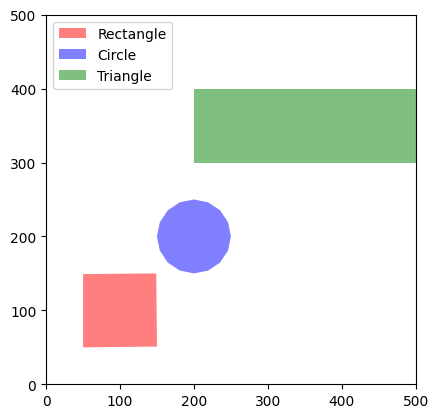

In [8]:
def simple_drawing():
    # Create shapes
    rect1 = rectangle(50, 50, 100, 100)
    circ1 = circle(200, 200, 50)
    tri1 = triangle(300, 100, 400, 100, 200, 300)

    # Create a RasterDrawing and add shapes
    drawing = RasterDrawing()
    drawing.add_shape(rect1)
    drawing.add_shape(circ1)
    drawing.add_shape(tri1)

    # Paint the shapes
    drawing.paint()

# Call the function to display the drawing
simple_drawing()


12. Implement the ability to load/save raster drawings and demonstate that your method works. One way to implement this ability:

   * Overload `__repr__` functions of all objects to return strings of the python code that would construct the object.
   
   * In the save method of raster drawing class, store the representations into the file.
   * Write a loader function that reads the file and uses `eval` to instantiate the object.

For example:

In [ ]:
class foo:
    def __init__(self,a,b=None):
        self.a=a
        self.b=b
        
    def __repr__(self):
        return "foo("+repr(self.a)+","+repr(self.b)+")"
    
    def save(self,filename):
        f=open(filename,"w")
        f.write(self.__repr__())
        f.close()
        
   
def foo_loader(filename):
    f=open(filename,"r")
    tmp=eval(f.read())
    f.close()
    return tmp


In [ ]:
# Test
print(repr(foo(1,"hello")))

In [ ]:
# Create an object and save it
ff=foo(1,"hello")
ff.save("Test.foo")

In [ ]:
# Check contents of the saved file
!cat Test.foo

In [ ]:
# Load the object
ff_reloaded=foo_loader("Test.foo")
ff_reloaded